### Feature engineering

#### Process of creating new features or transforming existing features to get most out of data

1. Length of text field
2. Percent of characters that are capitalized
3. Percentage of characters which are punctuations
4. Power transforations
5. Transform Skewed data  
6. Standardizations

In [1]:
# # reading the data

# Reading the raw file
import pandas as pd
pd.set_option('display.max_colwidth',100)
data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t', header = None)
data.columns = ['label','body_text']
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!



### Create feature for text message length

In [5]:
# Counting the length
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()



,label,body_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


### Create feature for percentage of punctuations

In [33]:
### Create feature for % of text that is punctuation

import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round((count/(len(text)-text.count(" "))),3)*100


# using list comprehension

data['body_per_punct'] = data['body_text'].apply(lambda x: count_punct(x)) 
data.head()

,label,body_text,body_len,body_per_punct
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Evaluating the features created

C:\Users\abhi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\abhi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


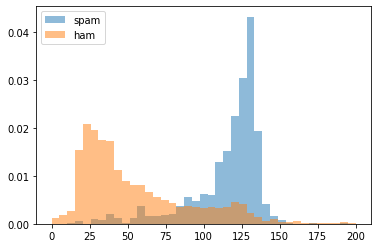

In [41]:
# Length of body text

from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins =  np.linspace(0,200,40)
pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc='upper left')


### Clear distinction between spam and ham 

C:\Users\abhi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\Users\abhi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


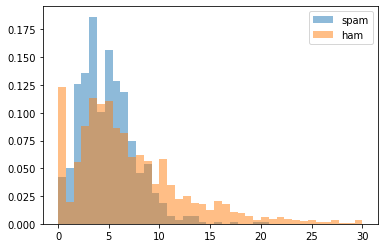

In [45]:
# Percent of punctuations

bins =  np.linspace(0,30,40)
pyplot.hist(data[data['label']=='spam']['body_per_punct'], bins, alpha = 0.5, normed = True, label = 'spam')
pyplot.hist(data[data['label']=='ham']['body_per_punct'], bins, alpha = 0.5, normed = True, label = 'ham')
pyplot.legend(loc='upper right')


### we can now select the significant features, spam messages are of more length than ham messages,but the punctuation hypothesis is not signnificant


## Identifying features for transformation

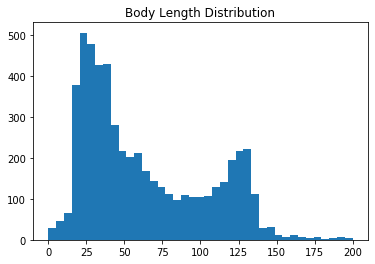

In [51]:
bins =  np.linspace(0,200,40)
pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

#### More or less normally distributed

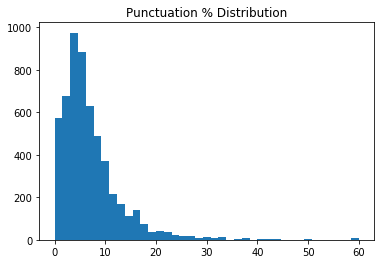

In [52]:
bins =  np.linspace(0,60,40)
pyplot.hist(data['body_per_punct'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

#### Skewed distribution, can be transformed

### Box cox power transformation y^x

1. Select a range of exponents
2. Apply each element of range
3. select one which yeilded the best reults

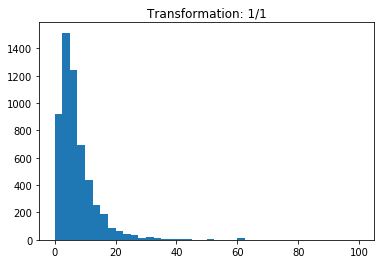

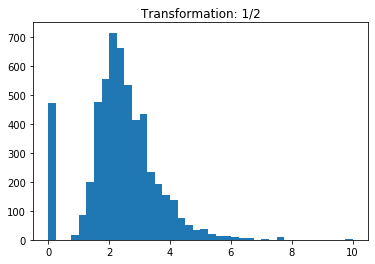

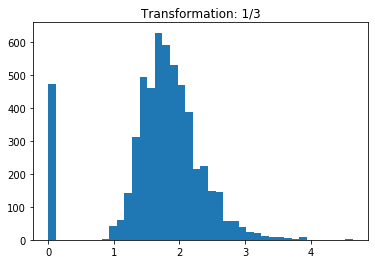

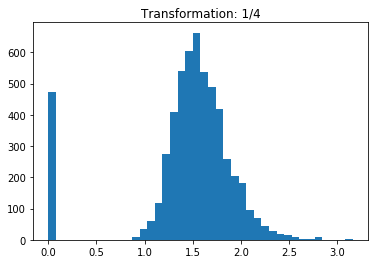

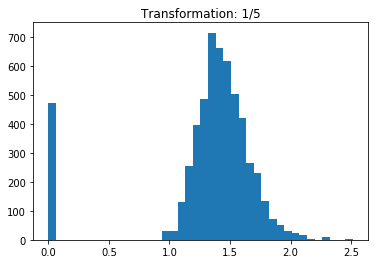

In [54]:
for i in [1,2,3,4,5]:
    bins =  np.linspace(0,60,40)
    pyplot.hist(data['body_per_punct']**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

In [ ]:
# Applying the transformation